# Loading the Data

In [1]:
import pandas as pd

user_details = pd.read_excel("C:/Users/manis/Downloads/Data Analyst Intern Assignment - Excel.xlsx", sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel("C:/Users/manis/Downloads/Data Analyst Intern Assignment - Excel.xlsx", sheet_name='CookingSessions.csv')
order_details = pd.read_excel("C:/Users/manis/Downloads/Data Analyst Intern Assignment - Excel.xlsx", sheet_name='OrderDetails.csv')


# Inspecting and Cleaning the Data

In [2]:
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [3]:
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


In [4]:
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])


# Merging the Datasets

In [5]:
user_details = user_details.drop_duplicates(subset=['User ID'])
cooking_sessions = cooking_sessions.drop_duplicates(subset=['User ID'])
order_details = order_details.drop_duplicates(subset=['User ID'])


In [6]:
user_details['User ID'] = user_details['User ID'].str.strip().str.upper()
cooking_sessions['User ID'] = cooking_sessions['User ID'].str.strip().str.upper()
order_details['User ID'] = order_details['User ID'].str.strip().str.upper()


In [7]:
# Check for missing User IDs
missing_in_user_details = set(order_details['User ID']) - set(user_details['User ID'])
print("Missing in User Details:", missing_in_user_details)

missing_in_cooking_sessions = set(order_details['User ID']) - set(cooking_sessions['User ID'])
print("Missing in Cooking Sessions:", missing_in_cooking_sessions)


Missing in User Details: set()
Missing in Cooking Sessions: set()


In [8]:
merged_data = pd.merge(order_details, cooking_sessions, on='User ID', how='outer')
merged_data = pd.merge(merged_data, user_details, on='User ID', how='outer')


In [9]:
print("Merged Data Preview:")
print(merged_data.head())

print("Columns in Merged Data:", merged_data.columns)
print("Total Rows in Merged Data:", len(merged_data))


Merged Data Preview:
   Order ID User ID Order Date Meal Type_x      Dish Name_x Order Status  \
0    1001.0    U001 2024-12-01      Dinner        Spaghetti    Completed   
1    1002.0    U002 2024-12-01       Lunch     Caesar Salad    Completed   
2    1003.0    U003 2024-12-02      Dinner  Grilled Chicken     Canceled   
3    1005.0    U004 2024-12-03       Lunch     Caesar Salad    Completed   
4    1007.0    U005 2024-12-04      Dinner  Grilled Chicken    Completed   

   Amount (USD) Time of Day    Rating Session ID_x  ... Duration (mins)  \
0          15.0       Night  5.000000         S001  ...            30.0   
1          10.0         Day  4.000000         S002  ...            20.0   
2          12.5       Night  4.285714         S003  ...            40.0   
3           9.0         Day  4.000000         S005  ...            15.0   
4          13.5       Night  4.000000         S007  ...            45.0   

  Session Rating      User Name Age       Location  Registration Date  

# Analyzing the Relationships

In [10]:
print("Columns in merged_data:", merged_data.columns)


Columns in merged_data: Index(['Order ID', 'User ID', 'Order Date', 'Meal Type_x', 'Dish Name_x',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID_x',
       'Session ID_y', 'Dish Name_y', 'Meal Type_y', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'User Name', 'Age',
       'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal',
       'Total Orders'],
      dtype='object')


In [11]:
print(merged_data[['Dish Name_x', 'Dish Name_y']].drop_duplicates())


       Dish Name_x      Dish Name_y
0        Spaghetti        Spaghetti
1     Caesar Salad     Caesar Salad
2  Grilled Chicken  Grilled Chicken
7    Veggie Burger    Veggie Burger
8              NaN              NaN


In [12]:
merged_data = merged_data.rename(columns={'Dish Name_x': 'Dish Name'})
merged_data = merged_data.drop(columns=['Dish Name_y'])


In [13]:
# Group by 'User ID' and 'Dish Name' to count occurrences
cooking_order_relation = merged_data.groupby(['User ID', 'Dish Name']).size().reset_index(name='Count')

# Display the result
print(cooking_order_relation)


  User ID        Dish Name  Count
0    U001        Spaghetti      1
1    U002     Caesar Salad      1
2    U003  Grilled Chicken      1
3    U004     Caesar Salad      1
4    U005  Grilled Chicken      1
5    U006  Grilled Chicken      1
6    U007        Spaghetti      1
7    U008    Veggie Burger      1


In [14]:
popular_dishes = merged_data['Dish Name'].value_counts()
print(popular_dishes)


Grilled Chicken    3
Spaghetti          2
Caesar Salad       2
Veggie Burger      1
Name: Dish Name, dtype: int64


In [15]:
age_analysis = merged_data.groupby('Age')['Total Orders'].sum()
location_analysis = merged_data.groupby('Location')['Total Orders'].sum()
print(age_analysis, location_analysis)


Age
25     7
27    10
28    12
29     8
30     9
31     5
33     6
35     8
38    14
42    15
Name: Total Orders, dtype: int64 Location
Austin            7
Boston           14
Chicago          15
Dallas            6
Los Angeles       8
Miami             5
New York         12
Phoenix           8
San Francisco    10
Seattle           9
Name: Total Orders, dtype: int64


# Visualizations

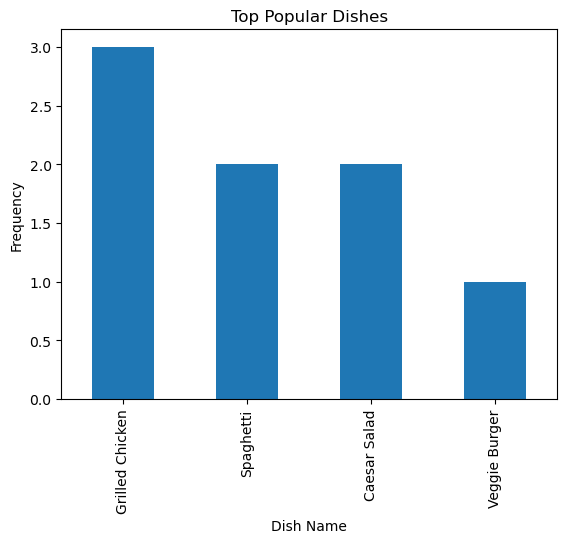

In [18]:
import matplotlib.pyplot as plt

popular_dishes.head(10).plot(kind='bar')
plt.title('Top Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()


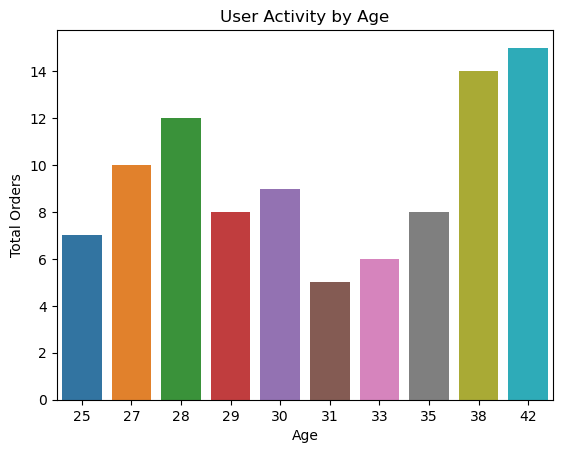

In [17]:
import seaborn as sns

sns.barplot(x=merged_data['Age'], y=merged_data['Total Orders'])
plt.title('User Activity by Age')
plt.show()
